<a href="https://colab.research.google.com/github/Gabrielvinicius27/imersao-dados-desafio-final/blob/main/DesafioFinal_ImersaoDadosAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

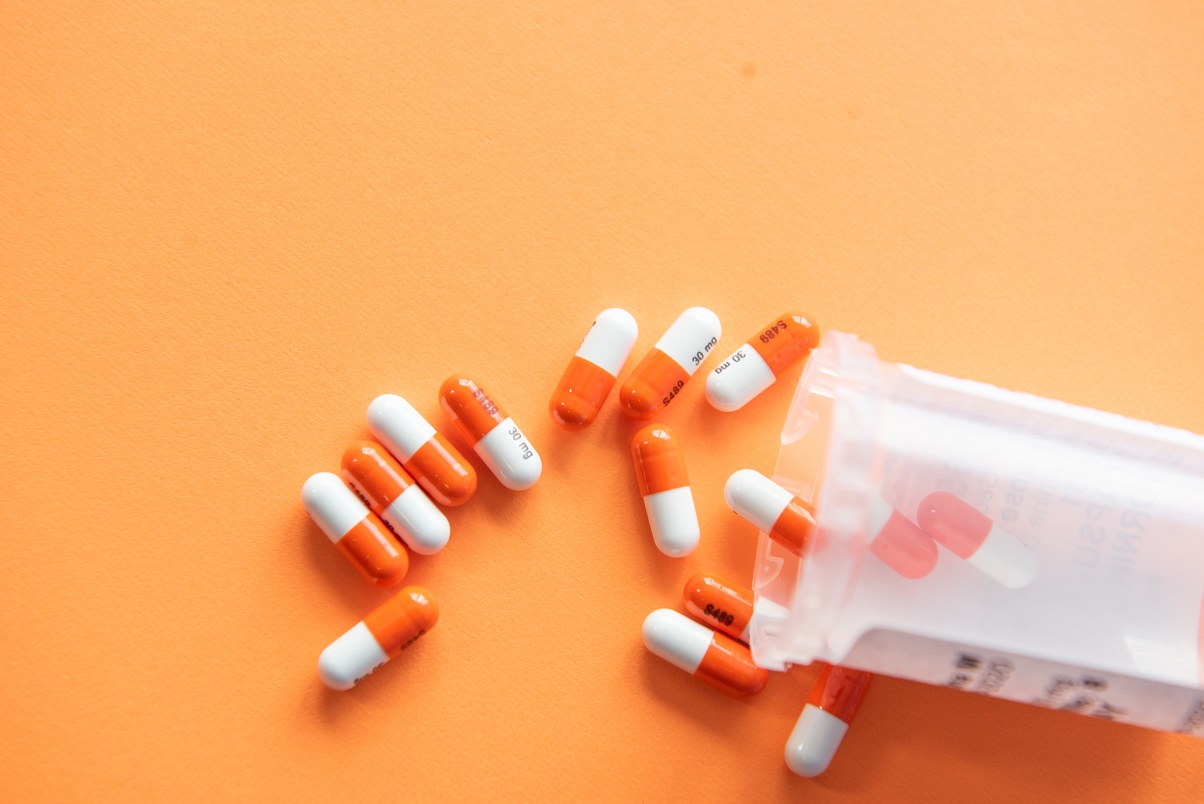
Imagem do site Unplash postada por @victoriabcphotographer
#**Desafio Imersão Dados Alura!**
###Análise de Dados Farmaceuticos

#### **Sobre mim**
Este notebook está sendo desenvolvido por Gabriel Vinicius Santos de Oliveira, tenho 23 anos, atualmente trabalho com TI, já fiz alguns projetos utilizando machine learning em meu trabalho, mas quero melhorar minhas habilidades.

* **LinkedIn**: https://www.linkedin.com/in/gabrielviniciusoliveira/
* **GitHub**: https://github.com/Gabrielvinicius27
* **Kaggle**: https://www.kaggle.com/gahvinicius 

#### **Sobre os dados**
Os dados que serão analisados foram coletados da competição do Kaggle "Mechanisms of Action (MoA) Prediction" [link para a competição](https://www.kaggle.com/c/lish-moa/data), são duas bases de dados:
* Dados de compostos, métodos de experimento que foram utilizados e as expressões gênicas e viabilidade celular de cada experimento;
* Dados dos resultados obtidos, contendo quais mecânismos de ação foram ativados.

#### **O que será feito?**
Os dados serão análisados com o objetivo de classificar quando um composto ativará um ou mais mecânismos de ação, segundo Ronald L. Davis (2020), esclarecer os mecânismos de ação é essencial no inicio do processo de descoberta de novas drogas, os modelos que serão gerados nesse notebook tem como objetivo facilitar essa tarefa. Com base na expressão gênica, viabilidade genética e método de experimênto apresentado, as seguintes etapas serão aplicadas:
* Análise exploratória;
* Tratamento de dados;
* Aplicação de um modelo de Machine Learning;
* Análise de resultados.

#### **Referências bibliográficas utilizadas**
DAVIS, Ronald L.. Mechanism of Action and Target Identification: A Matter of Timing in Drug Discovery. Iscience. Florida, Usa, p. 101487-101487. out. 2020. Disponível em: https://www.sciencedirect.com/science/article/pii/S2589004220306799. Acesso em: 12 maio 2021.

NATUURE EDUCATION. Gene Expression. 2014. Disponível em: https://www.nature.com/scitable/topicpage/gene-expression-14121669/. Acesso em: 10 maio 2021.

CELL SIGNALING TECHNOLOGY INC. Synopsis of Cell Proliferation, Metabolic Status, and Cell Death. Disponível em: https://www.cellsignal.com/science-resources/cell-viability-and-survival. Acesso em: 10 maio 2021.



##**1. Análise Exploratória**

####1.1. Importando as Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Necessário para utilizar o seaborn no notebook
sns.set() 

####1.2. Importando os Dados
Os dados dos resultados e dos experimentos estão no repositório do GitHub, é necessário acessar através da URL, e descomprimir caso necessário.

In [2]:
url_dados = 'https://github.com/Gabrielvinicius27/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
dados_experimentos = pd.read_csv(url_dados, compression = 'zip')
dados_experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
url_dados = 'https://github.com/Gabrielvinicius27/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'
dados_resultados = pd.read_csv(url_dados)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####1.3 Análise Exploratória nos Dados dos Experimentos 


Primeiramente, analisar algumas métricas dos dados_experimentos

In [4]:
dados_experimentos.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

Cada célula possuí um DNA em seu núcleo, no DNA estão os genes, segundo Nature Education (2014), os genes codificam as proteínas e elas ditam a função celular. A expressão genica diz sobre a forma como o gene está produzindo as proteínas, quando um composto é adicionado essa expressão gênica pode se manter em níveis normais (controle), aumentar ou reduzir. 

A viabilidade celular segundo Cell Signaling Technology, é uma medida da proporção de células vivas e saudáveis em uma população 

Abaixo serão plotados histogramas de algumas expressões gênicas para analisarmos a distribuição desses dados, concluí-se que possuem uma distribuição normal e que esses dados aparentemente foram normalizados, todas as expressões gênicas (g-0 à g-771) e viabilidades celulares (c-0 à c-99) estão no intervalo de -10 à 10

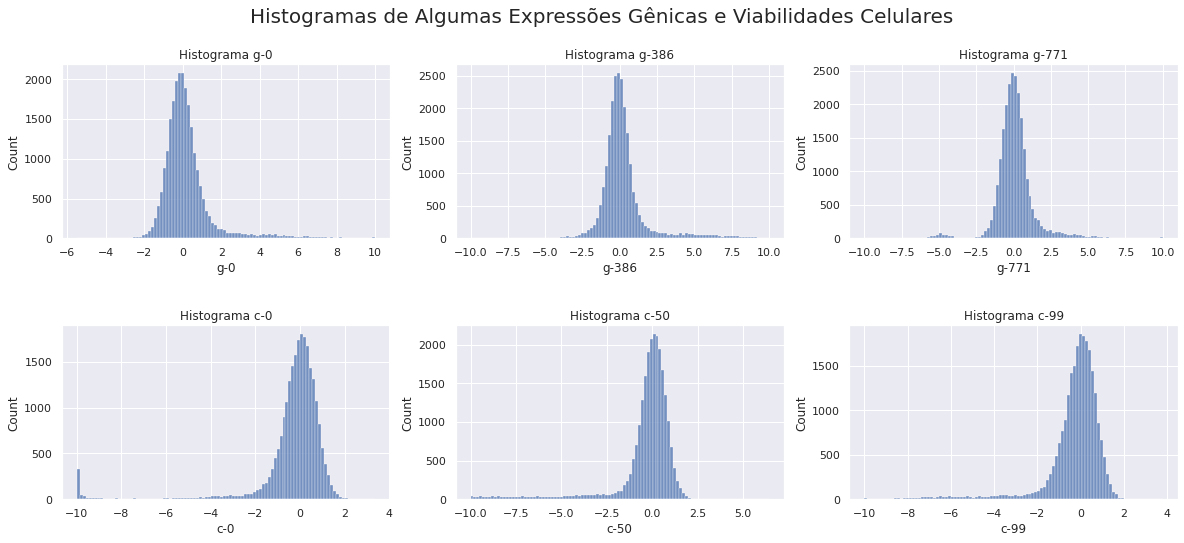

In [5]:
fig, axes = plt.subplots(2, 3, figsize = (20,8), gridspec_kw={'hspace':0.5})
fig.suptitle("Histogramas de Algumas Expressões Gênicas e Viabilidades Celulares",
             fontsize = 20)

values = ['g-0', 'g-386', 'g-771', 'c-0', 'c-50', 'c-99']
count = 0
for row in range(0,2):
  for column in range(0,3):
    sns.histplot(ax = axes[row][column], x = dados_experimentos[values[count]], 
                bins = 100)
    axes[row][column].set_title('Histograma {}'.format(values[count]))
    count += 1
plt.show()

Análise de quais experimentos são do tipo de tratamento com controle, ou seja, nenhuma droga foi aplicadada

In [6]:
controle = dados_experimentos.query('tratamento == "com_controle"')['droga']\
           .value_counts().index[0]
print("Nome anonimizado do controle: {}"
      .format(controle))

Nome anonimizado do controle: cacb2b860


Analisando as 10 drogas que mais aparecem em dados_experimentos

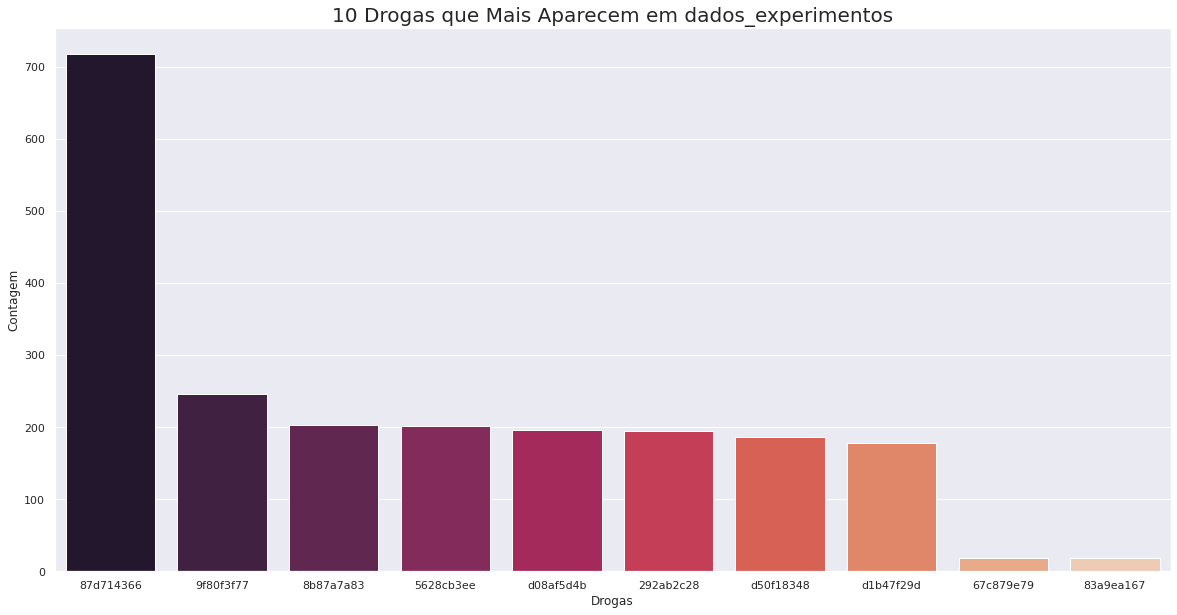

In [7]:
dados_experimentos_com_droga = dados_experimentos.query('tratamento == "com_droga"')
contagem_10_drogas_frequentes = dados_experimentos_com_droga['droga'].value_counts()[:10]

plt.figure(figsize = (20,10))

ax = sns.barplot(x = contagem_10_drogas_frequentes.index, 
            y = contagem_10_drogas_frequentes.values,
            palette = sns.color_palette('rocket', 
                                        n_colors=len(contagem_10_drogas_frequentes.index)))

ax.set(xlabel = 'Drogas', ylabel = 'Contagem')
ax.set_title('10 Drogas que Mais Aparecem em dados_experimentos',
             fontdict = {'fontsize':20})

plt.show()

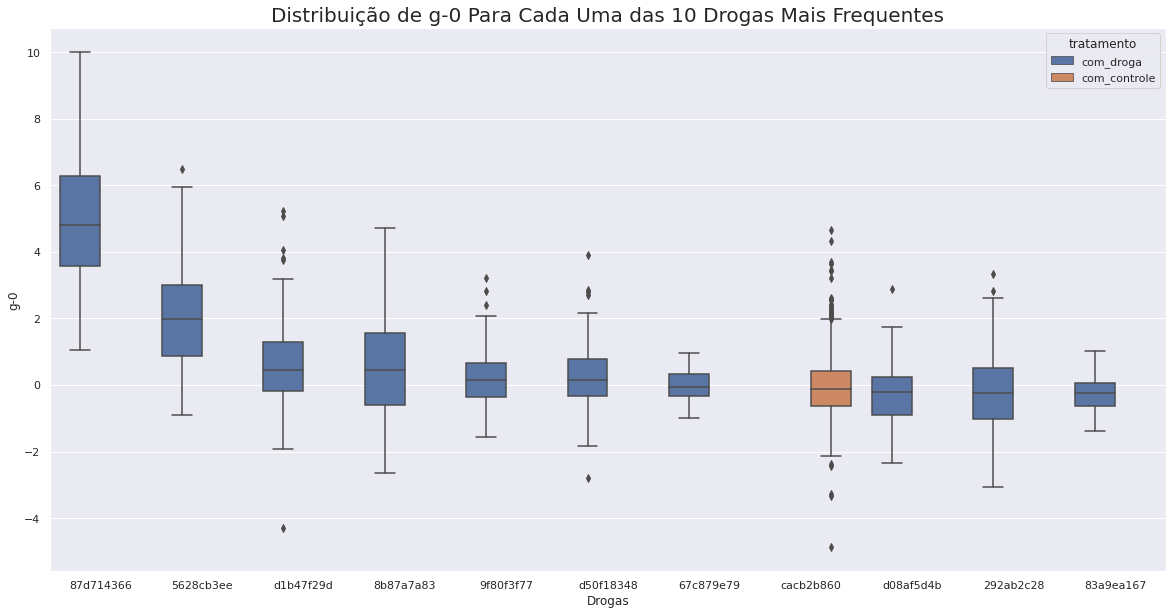

In [8]:
drogas_analise = [valor for valor in contagem_10_drogas_frequentes.index]
drogas_analise.append(controle)
order = dados_experimentos.query("droga in @drogas_analise")[['droga','g-0']]\
        .groupby('droga').median()\
        .sort_values(by=['g-0'], ascending = False)

plt.figure(figsize = (20,10))
ax = sns.boxplot(data = dados_experimentos.query("droga in @drogas_analise"),
                 x = 'droga', 
                 y = 'g-0',
                 hue = 'tratamento',
                 order = order.index)

ax.set(xlabel = 'Drogas')
ax.set_title('Distribuição de g-0 Para Cada Uma das 10 Drogas Mais Frequentes',
             fontdict = {'fontsize':20})

plt.show()

Analisando o campo tempo e doses

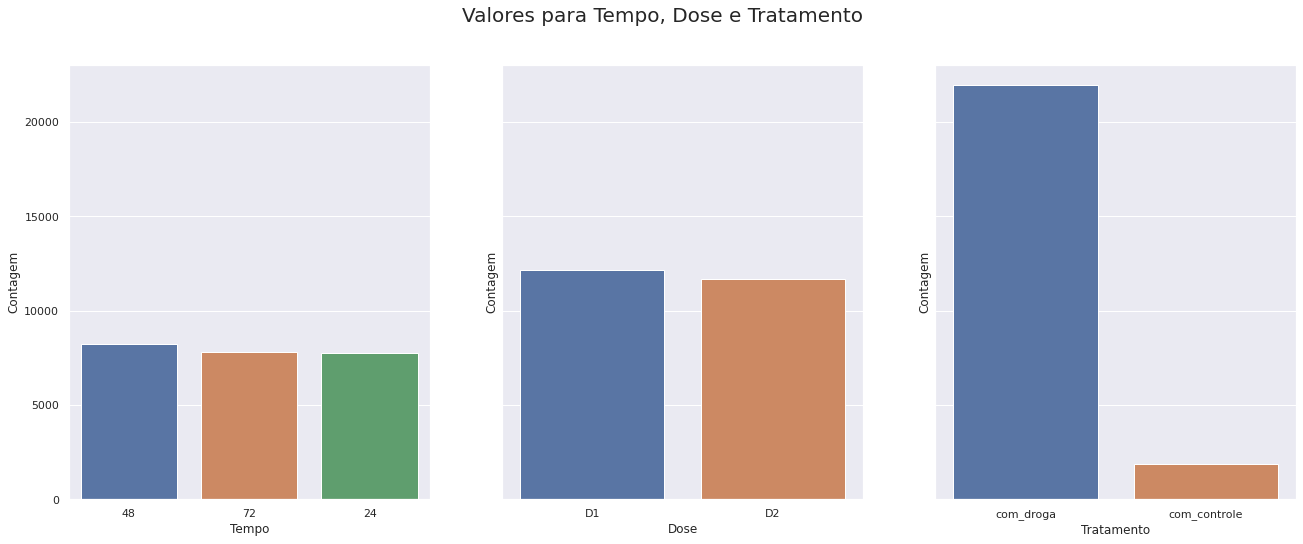

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (22, 8), sharey = True)
fig.suptitle("Valores para Tempo, Dose e Tratamento", fontsize = 20)

sns.countplot(ax = axes[0], x = dados_experimentos['tempo'], 
              order = dados_experimentos['tempo'].value_counts().index)
axes[0].set(xlabel = "Tempo", ylabel = 'Contagem')

sns.countplot(ax = axes[1], x = dados_experimentos['dose'],
              order = dados_experimentos['dose'].value_counts().index)
axes[1].set(xlabel = "Dose", ylabel = 'Contagem')

sns.countplot(ax = axes[2], x = dados_experimentos['tratamento'],
              order = dados_experimentos['tratamento'].value_counts().index)
axes[2].set(xlabel = "Tratamento", ylabel = 'Contagem')

plt.show()

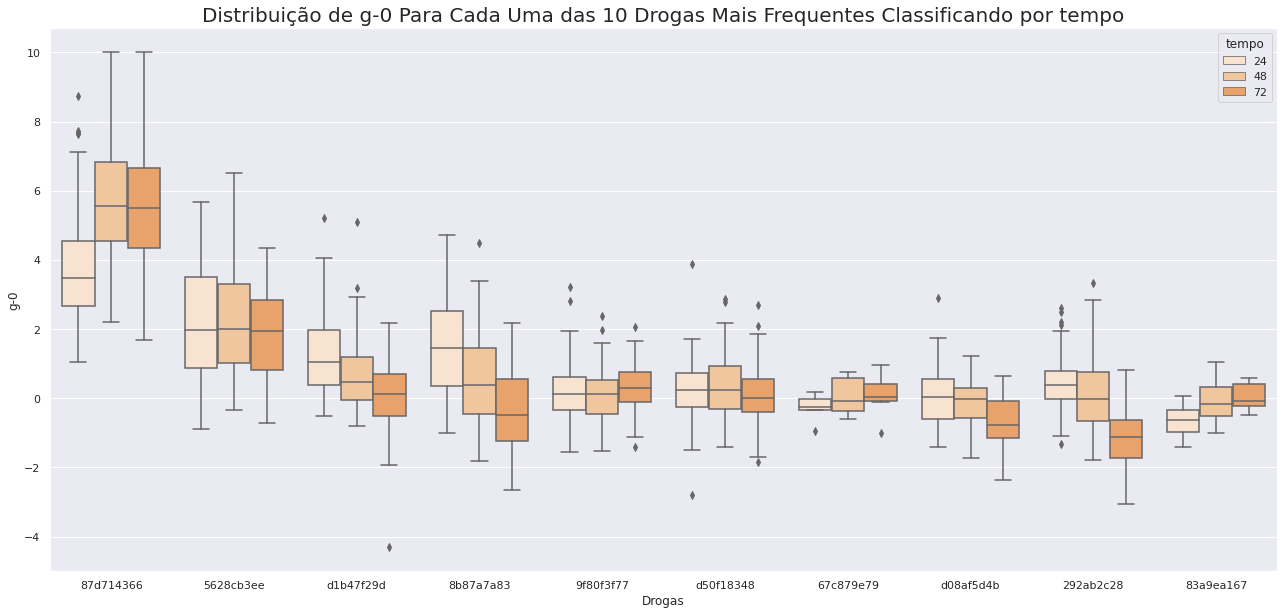

In [10]:
order = dados_experimentos.query("droga in @contagem_10_drogas_frequentes.index")[['droga','g-0']]\
        .groupby('droga').median()\
        .sort_values(by=['g-0'], ascending = False)

plt.figure(figsize = (22,10))
ax = sns.boxplot(data = dados_experimentos.query("droga in @contagem_10_drogas_frequentes.index"),
                 x = 'droga', 
                 y = 'g-0',
                 hue = 'tempo',
                 order = order.index,
                 palette = sns.color_palette('Oranges'))

ax.set(xlabel = 'Drogas')
ax.set_title('Distribuição de g-0 Para Cada Uma das 10 Drogas Mais Frequentes\
 Classificando por tempo',
             fontdict = {'fontsize':20})

plt.show()

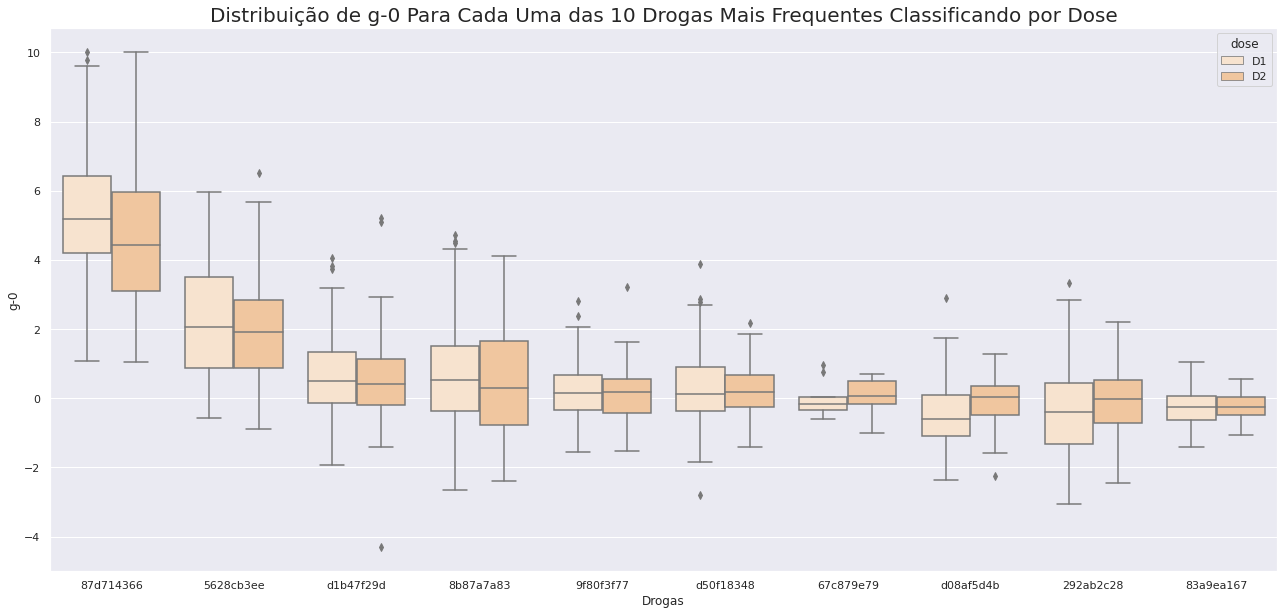

In [11]:
order = dados_experimentos.query("droga in @contagem_10_drogas_frequentes.index")[['droga','g-0']]\
        .groupby('droga').median()\
        .sort_values(by=['g-0'], ascending = False)

plt.figure(figsize = (22,10))
ax = sns.boxplot(data = dados_experimentos.query("droga in @contagem_10_drogas_frequentes.index"),
                 x = 'droga', 
                 y = 'g-0',
                 hue = 'dose',
                 order = order.index,
                 palette = sns.color_palette('Oranges'))

ax.set(xlabel = 'Drogas')
ax.set_title('Distribuição de g-0 Para Cada Uma das 10 Drogas Mais Frequentes\
 Classificando por Dose',
             fontdict = {'fontsize':20})

plt.show()

#### 1.4 Análise Exploratória nos Dados dos Resultados


Analisar algumas métricas dos dados_resultados

In [12]:
dados_resultados.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.00000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,0.015117,0.002771,0.000294,0.001764,0.000504,0.000504,0.002016,0.003737,0.003359,0.001512,0.001554,0.003065,0.000252,0.001806,0.000504,0.000546,0.000504,0.000756,0.003065,0.001512,0.000966,0.002058,0.001974,0.000252,0.000042,0.000504,0.004073,0.000798,0.004031,0.000252,...,0.004325,0.000798,0.002352,0.009364,0.000504,0.002813,0.000252,0.00147,0.001554,0.001050,0.009910,0.016965,0.001848,0.001512,0.001512,0.001050,0.011212,0.001050,0.002981,0.000252,0.000798,0.002520,0.001260,0.000798,0.001554,0.001260,0.000294,0.001512,0.005333,0.000756,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,0.122022,0.052573,0.017143,0.041960,0.022443,0.022443,0.044851,0.061020,0.057864,0.038852,0.039387,0.055283,0.015871,0.042456,0.022443,0.023359,0.022443,0.027483,0.055283,0.038852,0.031063,0.045315,0.044383,0.015871,0.006480,0.022443,0.063693,0.028236,0.063365,0.015871,...,0.065625,0.028236,0.048437,0.096317,0.022

MOA ou mecânismo de ação é descrito como a ação da droga no alvo molecular, existem MOAs inibidores, bloqueadores, agonistas, antagonistas e outros tipos.

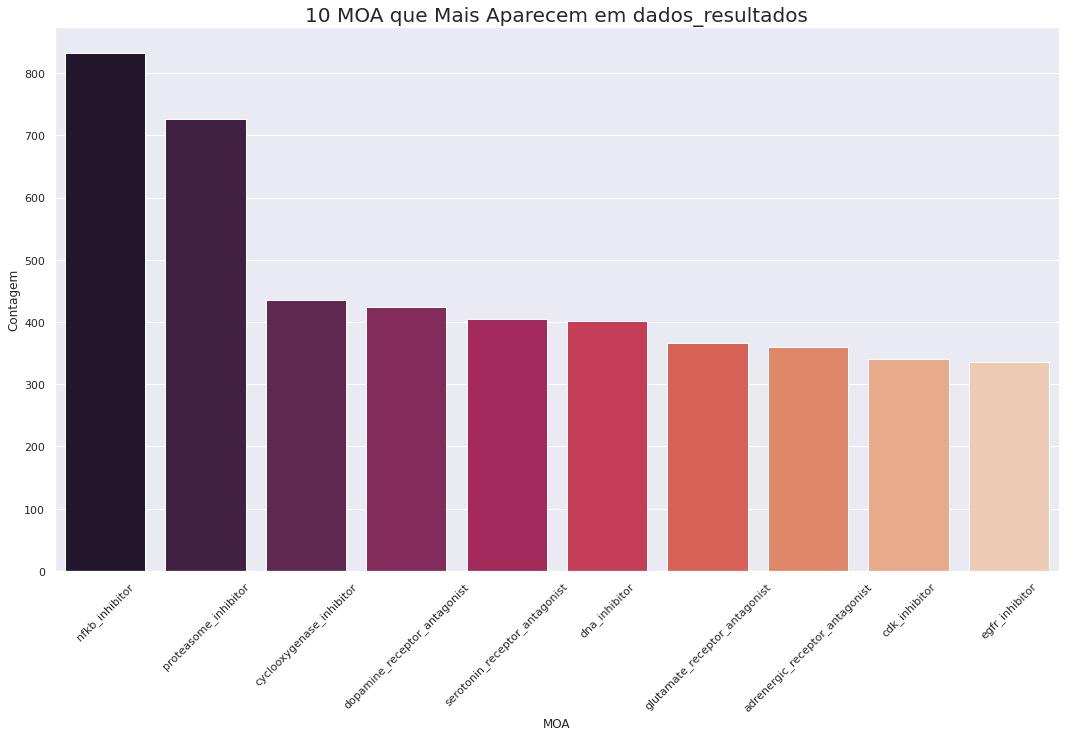

In [13]:
contagem_MOA = dados_resultados.drop('id', axis = 1)\
               .sum().sort_values(ascending = False)[:10]

plt.figure(figsize = (18,10))

ax = sns.barplot(x = contagem_MOA.index, 
            y = contagem_MOA.values,
            palette = sns.color_palette('rocket', 
                                        n_colors=len(contagem_MOA.index)))

ax.set(xlabel = 'MOA', ylabel = 'Contagem')
ax.set_title('10 MOA que Mais Aparecem em dados_resultados',
             fontdict = {'fontsize':20})
plt.xticks(rotation=45)

plt.show()


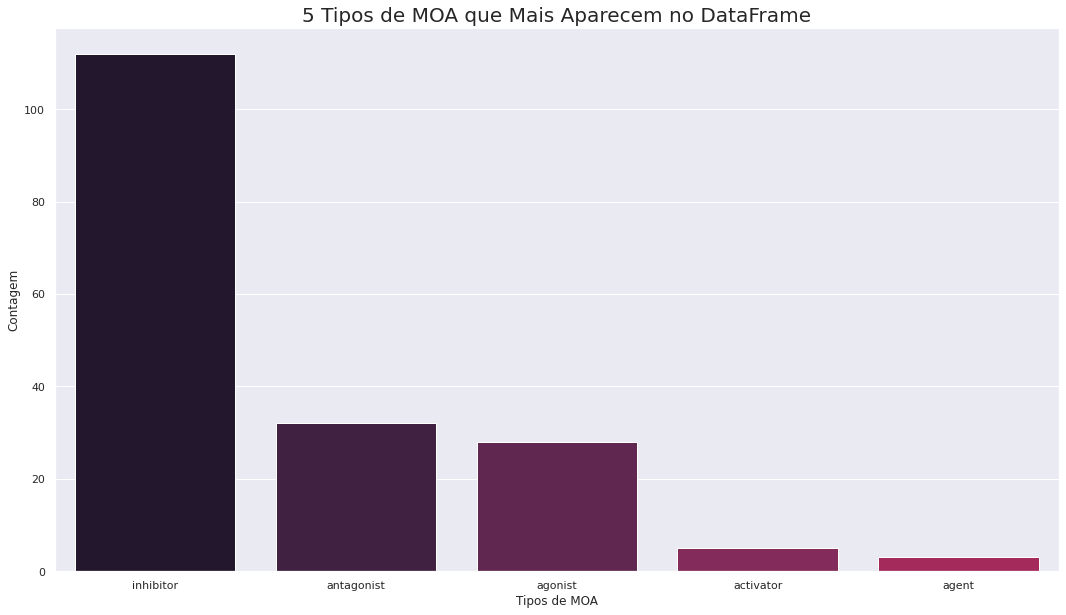

In [14]:
sns.set()
# Buscando os sufixos das colunas
sufixos = [coluna.split('_')[-1] for coluna in dados_resultados.drop('id', axis=1).columns]

# Plotando os sufixos que mais aparecem
plt.figure(figsize=(18,10))
sufixos = pd.Series(sufixos).value_counts()[:5]

ax = sns.barplot(x = sufixos.index, y = sufixos.values,
                 palette = sns.color_palette('rocket', 
                                              n_colors=len(contagem_MOA.index)))

ax.set(xlabel = 'Tipos de MOA', ylabel = 'Contagem')
plt.title('5 Tipos de MOA que Mais Aparecem no DataFrame', 
          fontdict = {'fontsize':20})

plt.show()

Criando novas colunas, n_moa diz quantos mecanismos de ação foram ativados, atibo_moa diz se pelo menos um mecânismo de ação foi ativado

In [15]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


Criando novas colunas, inhibitor, antagonist e agonist indica quantos mecânismos de ação desses tipos foram ativados, outro_moa indica quantos mecânismos de ação que não se encaixam nesses 3 tipos citados foram ativados, por exemplo: agent, blocker e etc.

In [16]:
dados_resultados['outro_moa'] = np.zeros(dados_resultados['id'].shape)
for column in dados_resultados.drop(['id','n_moa','ativo_moa'], axis=1):
    if (column.split('_')[-1] not in sufixos and column != 'outro_moa'):
        dados_resultados['outro_moa'] = dados_resultados['outro_moa'] + dados_resultados[column]


for sufixo in sufixos[:3].index:
    dados_resultados[sufixo] = np.zeros(dados_resultados['id'].shape)
    for column in dados_resultados.drop('id',axis=1).columns:
        if (column.split('_')[-1] == sufixo and column != sufixo):
            dados_resultados[sufixo] = dados_resultados[sufixo] + dados_resultados[column]

for sufixo in sufixos[:3].index:
    dados_resultados[sufixo] = dados_resultados[sufixo] >= 1
    dados_resultados[sufixo].replace({False:0, True:1}, inplace=True)
    dados_resultados['outro_moa'] = dados_resultados['outro_moa'] >= 1
    dados_resultados['outro_moa'].replace({False:0, True:1}, inplace=True)

dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,outro_moa,inhibitor,antagonist,agonist
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,0,1,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True,0,1,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,1,0,0,0


#### 1.5 Análise Exploratória das Duas Bases de Dados Unidas

In [17]:
dados_combinados = pd.merge(dados_experimentos, 
                            dados_resultados[['id','n_moa', 'ativo_moa', 
                                              'outro_moa', 'inhibitor', 'antagonist',
                                              'agonist']], 
                            on = 'id')

In [18]:
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,outro_moa,inhibitor,antagonist,agonist
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,0,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,0,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,0,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,1,0,0,0


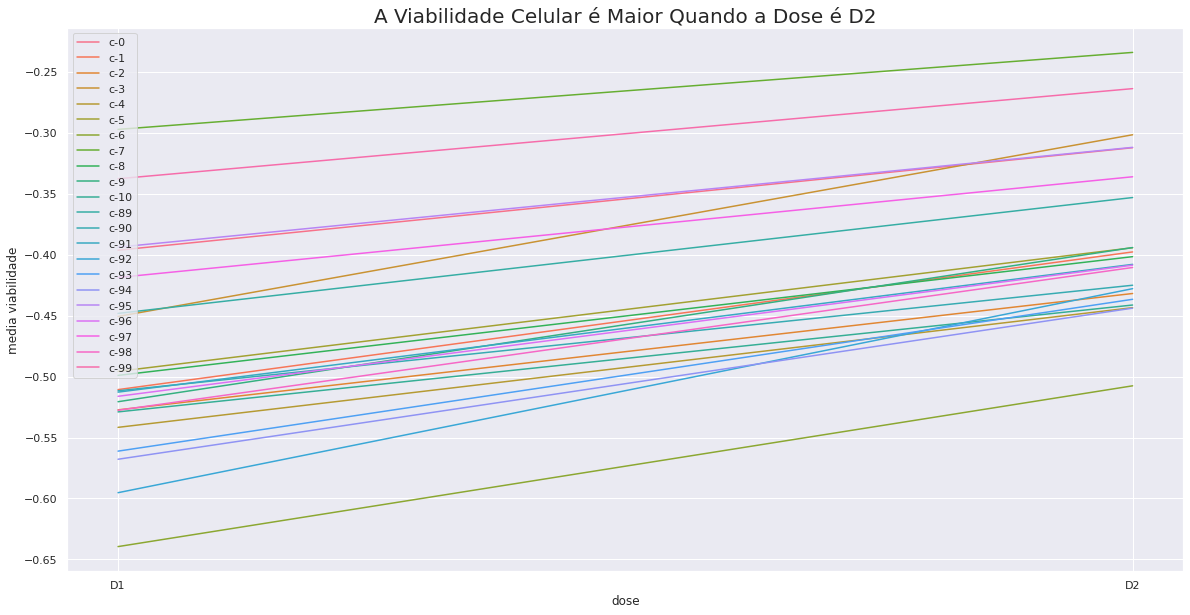

In [48]:
columns = [column for column in dados_combinados.loc[:, 'c-0':'c-10'].columns]
columns = columns + [column for column in dados_combinados.loc[:, 'c-89':'c-99'].columns]
columns.append('dose')

viabilidade_celular_medias_por_dose = dados_combinados.loc[:,columns].groupby('dose').mean()
viabilidade_celular_medias_por_dose['dose'] = viabilidade_celular_medias_por_dose.index

viabilidade_celular_medias_por_dose =pd.melt(viabilidade_celular_medias_por_dose, 
                                              id_vars = 'dose',
                                              var_name='viabilidade celular', 
                                              value_name='media viabilidade')

plt.figure(figsize = (20,10))
g = sns.lineplot(
    data = viabilidade_celular_medias_por_dose,
    x='dose',
    y='media viabilidade',
    hue='viabilidade celular',
)
plt.legend(loc='upper left')
g.set_title('A Viabilidade Celular é Maior Quando a Dose é D2', 
            fontdict={'fontsize':20})
plt.show()

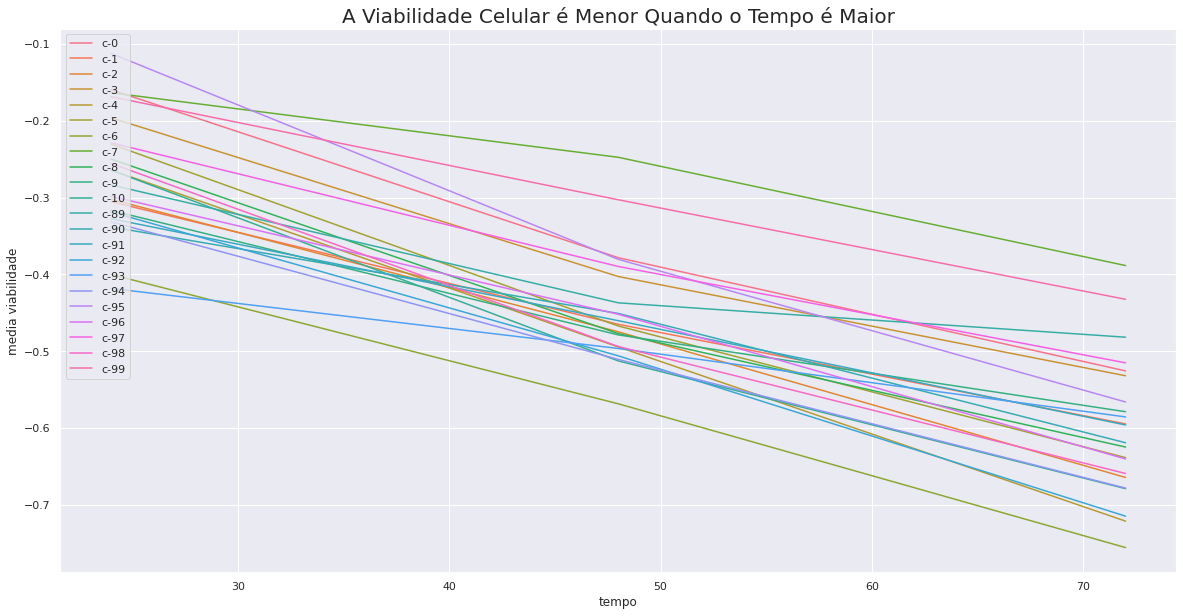

In [60]:
columns = [column for column in dados_combinados.loc[:, 'c-0':'c-10'].columns]
columns = columns + [column for column in dados_combinados.loc[:, 'c-89':'c-99'].columns]
columns.append('tempo')

viabilidade_celular_medias_por_tempo = dados_combinados.loc[:,columns].groupby('tempo').mean()
viabilidade_celular_medias_por_tempo['tempo'] = viabilidade_celular_medias_por_tempo.index

viabilidade_celular_medias_por_tempo =pd.melt(viabilidade_celular_medias_por_tempo, 
                                              id_vars = 'tempo',
                                              var_name='viabilidade celular', 
                                              value_name='media viabilidade')

plt.figure(figsize = (20,10))
g = sns.lineplot(
    data = viabilidade_celular_medias_por_tempo,
    x='tempo',
    y='media viabilidade',
    hue='viabilidade celular',
)
plt.legend(loc='upper left')
g.set_title('A Viabilidade Celular é Menor Quando o Tempo é Maior', 
            fontdict={'fontsize':20})
plt.show()

In [ ]:
# Renomeando a coluna droga para composto
dados_combinados.rename(columns = {'droga':'composto'}, inplace = True)
composto_controle = dados_combinados.query('tratamento == "com_controle"')['composto'].unique()
drogas_mais_frequentes = dados_combinados.query('tratamento == "com_droga"')['composto'].value_counts()[:5]
print(drogas_mais_frequentes)
compostos = [drogas for drogas in drogas_mais_frequentes.index]
compostos.append(composto_controle[0])
print(compostos)

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
Name: composto, dtype: int64
['87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee', 'd08af5d4b', 'cacb2b860']


In [ ]:
gene_maior_corr = dados_combinados.loc[:,'g-0':'g-771'].corrwith(dados_combinados.inhibitor).sort_values(ascending = False).index[0]

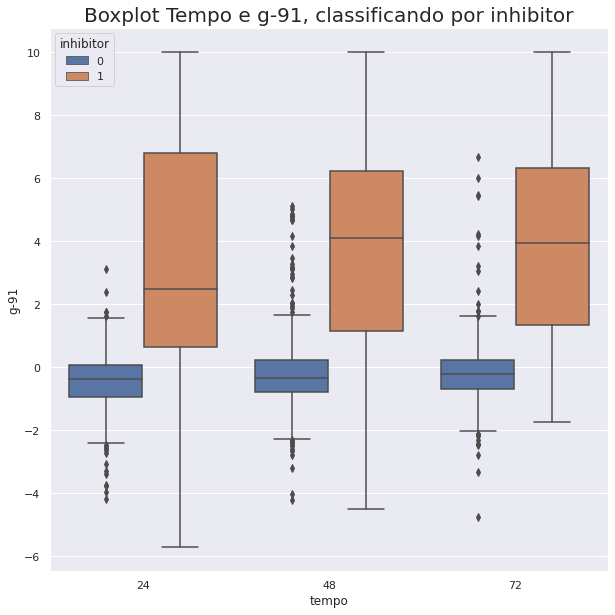

In [ ]:
sns.set()
plt.figure(figsize = (10,10))
ax = sns.boxplot(data = dados_combinados.query('composto in @compostos'), x = 'tempo', y = gene_maior_corr, hue='inhibitor')
ax.set_title('Boxplot Tempo e {}, classificando por inhibitor'.format(gene_maior_corr),
             fontdict = {'fontsize':20})
plt.show()

In [ ]:
drogas_mais_frequentes = dados_combinados.query('tratamento == "com_droga" & antagonist == 1')['composto'].value_counts()[:5]
print(drogas_mais_frequentes)
compostos = [drogas for drogas in drogas_mais_frequentes.index]
compostos.append(composto_controle[0])
print(compostos)

d488d031d    18
a7c2673c1    14
d149a15f5    13
a44e72ca3    13
fd4387eac    13
Name: composto, dtype: int64
['d488d031d', 'a7c2673c1', 'd149a15f5', 'a44e72ca3', 'fd4387eac', 'cacb2b860']


In [ ]:
gene_maior_corr = dados_combinados.loc[:,'g-0':'g-771'].corrwith(dados_combinados.antagonist).sort_values(ascending = False).index[0]

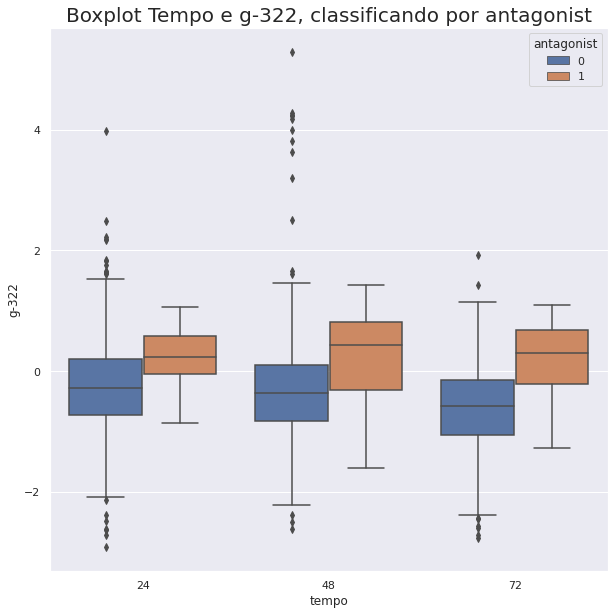

In [ ]:
sns.set()
plt.figure(figsize = (10,10))
ax = sns.boxplot(data = dados_combinados.query('composto in @compostos'), x = 'tempo', y = gene_maior_corr, hue='antagonist')
ax.set_title('Boxplot Tempo e {}, classificando por antagonist'.format(gene_maior_corr),
             fontdict = {'fontsize':20})
plt.show()

In [ ]:
drogas_mais_frequentes = dados_combinados.query('tratamento == "com_droga" & agonist == 1')['composto'].value_counts()[:5]
print(drogas_mais_frequentes)
compostos = [drogas for drogas in drogas_mais_frequentes.index]
compostos.append(composto_controle[0])
print(compostos)

1a52478dc    14
af12e2904    13
3ff075492    13
39cc616d2    12
824a6c1ca    12
Name: composto, dtype: int64
['1a52478dc', 'af12e2904', '3ff075492', '39cc616d2', '824a6c1ca', 'cacb2b860']


In [ ]:
gene_maior_corr = dados_combinados.loc[:,'g-0':'g-771'].corrwith(dados_combinados.agonist).sort_values(ascending = False).index[0]

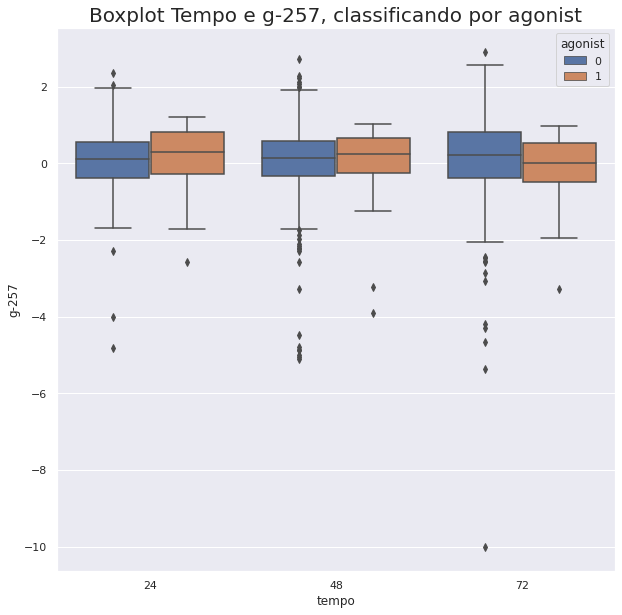

In [ ]:
sns.set()
plt.figure(figsize = (10,10))
ax = sns.boxplot(data = dados_combinados.query('composto in @compostos'), x = 'tempo', y = gene_maior_corr, hue='agonist')
ax.set_title('Boxplot Tempo e {}, classificando por agonist'.format(gene_maior_corr),
             fontdict = {'fontsize':20})
plt.show()

In [ ]:
drogas_mais_frequentes = dados_combinados.query('tratamento == "com_droga" & outro_moa == 1')['composto'].value_counts()[:5]
print(drogas_mais_frequentes)
compostos = [drogas for drogas in drogas_mais_frequentes.index]
compostos.append(composto_controle[0])
print(compostos)

5d9bb0ebe    14
11f66c124    14
02ae89796    13
10dbb5b2a    13
88c37c66a    13
Name: composto, dtype: int64
['5d9bb0ebe', '11f66c124', '02ae89796', '10dbb5b2a', '88c37c66a', 'cacb2b860']


In [ ]:
gene_maior_corr = dados_combinados.loc[:,'g-0':'g-771'].corrwith(dados_combinados.outro_moa).sort_values(ascending = False).index[0]

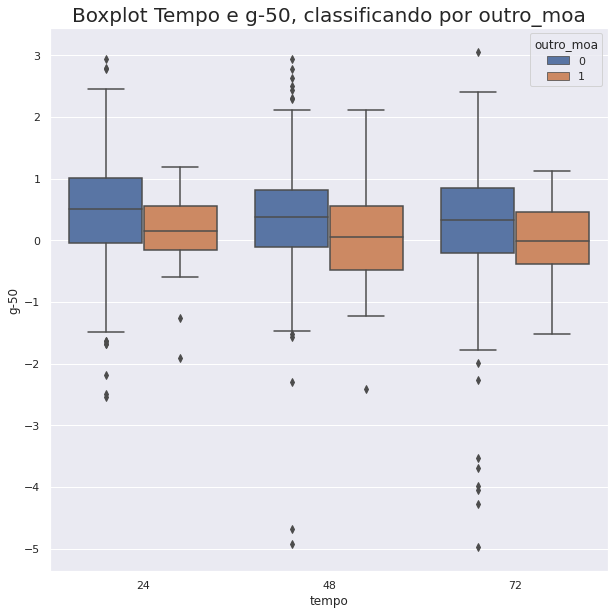

In [ ]:
sns.set()
plt.figure(figsize = (10,10))
ax = sns.boxplot(data = dados_combinados.query('composto in @compostos'), x = 'tempo', y = gene_maior_corr, hue='outro_moa')
ax.set_title('Boxplot Tempo e {}, classificando por outro_moa'.format(gene_maior_corr),
             fontdict = {'fontsize':20})
plt.show()

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = pd.get_dummies(dados_combinados.drop(['ativo_moa','composto','n_moa','id',
                                          'inhibitor', 'antagonist', 'agonist',
                                          'outro_moa'], 
                                         axis=1), columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados[['inhibitor', 'antagonist', 'agonist', 'outro_moa']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                                    random_state=376,
                                                    stratify = y)
forest =xgb. XGBClassifier(random_state=1, verbose=1,
                                max_depth=3)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, y_train)
y_predTrain = multi_target_forest.predict(X_train)
y_pred = multi_target_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_predTrain))

0.5156414024774302
0.5403915804944622


[(1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

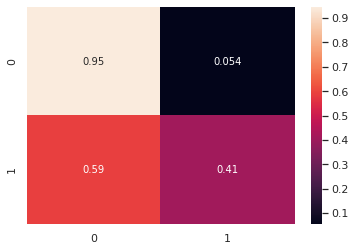

In [ ]:
from sklearn.metrics import confusion_matrix,  plot_confusion_matrix
print(list(zip(*y_pred)))
print(y_test)
print(accuracy_score(y_test['inhibitor'], list(zip(*y_pred))[0]))
sns.heatmap(confusion_matrix(y_test['inhibitor'], 
                             list(zip(*y_pred))[0], normalize='true'), 
            annot=True, annot_kws={"size": 10})
plt.show()

0.17237035481839177
       inhibitor  antagonist  agonist  outro_moa
3720           1           0        0          0
279            0           0        0          0
14344          1           0        0          0
13359          0           0        0          0
3747           1           0        0          0
...          ...         ...      ...        ...
10249          0           1        0          0
14390          1           0        0          0
3566           0           0        0          0
20327          0           1        0          0
16959          0           0        0          0

[4763 rows x 4 columns]
0.8597522569808944


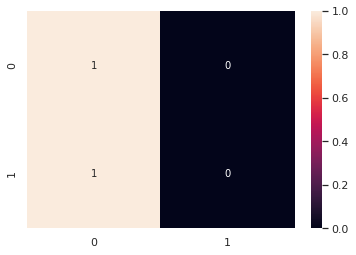

In [ ]:
print(np.mean(list(zip(*y_pred))[0]))
print(y_test)
print(accuracy_score(y_test['antagonist'], list(zip(*y_pred))[1]))
sns.heatmap(confusion_matrix(y_test['antagonist'], 
                             list(zip(*y_pred))[1], normalize='true'), 
            annot=True, annot_kws={"size": 10})
plt.show()